In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pylattica.discrete import PhaseSet
from pylattica.square_grid import DiscreteGridSetup

# Square Grid Simulations

Many of the most common Cellular Automaton simulations take place on a grid of square cells. `pylattica` has a number of classes that support this use case. In this demonstration, we will consider a simple simulation in which cells can take on one of the following states, each labelled by a letter:

In [3]:
phases = PhaseSet(["A", "B", "C", "D", "E"])

To set up a simulation that involves discrete cell state values (i.e. "A", "B", "C", "D", or "E" in our case), and takes place on a square grid, we use the `DiscreteGridSetup` class. This class provides support for initializing a number of common scenarios that you might want to use as simulation starting points. To create the setup object, just provide the set of all possible phases that can occur during your simulation.

In [4]:
setup = DiscreteGridSetup(phases)

We will also create a `DiscreteSquareGridArtist2D` to visualize each of the states in this demonstration.

In [5]:
from pylattica.visualization import DiscreteSquareGridArtist2D

step_artist = DiscreteSquareGridArtist2D()

### Random Noise

This setup mode just provides a totally random distribution of the phases you specify.

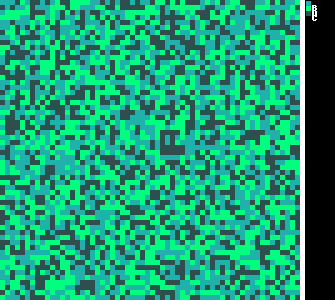

In [6]:
simulation_side_length = 40
phases_to_include = ["B", "C", "D"]

simulation = setup.setup_noise(60, phases_to_include)
step_artist.jupyter_show(simulation.state, cell_size=5)

#### Interface

This method sets up an interface between two phases

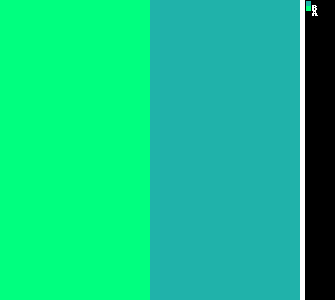

In [7]:
simulation_side_length = 60
left_phase = "A"
right_phase = "B"

simulation = setup.setup_interface(simulation_side_length, left_phase, right_phase)
step_artist.jupyter_show(simulation.state, cell_size=5)

#### Random sites

Chooses cells separated by a buffer and assigns phases with the desired ratio to them.

100%|████████████████████████████████████████| 3600/3600 [00:00<00:00, 27226.70it/s]


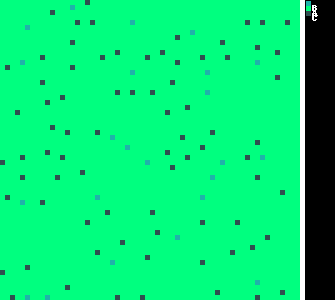

In [8]:
simulation_side_length = 60
total_num_sites = 100
background_phase = "A"
site_phases = ["B", "C"]
site_ratios = [1, 2] # There should be 2 C sites for every 1 B site
buffer = 2 # Each site should be at least 2 cells away from any other

simulation = setup.setup_random_sites(
    simulation_side_length,
    background_spec=background_phase,
    num_sites_desired=total_num_sites,
    nuc_species=site_phases,
    nuc_ratios=site_ratios,
    buffer=buffer
)
step_artist.jupyter_show(simulation.state, cell_size=5)

#### Single Central Particle

Assigns the central region of the specified radius to one phase, and everything else to another.

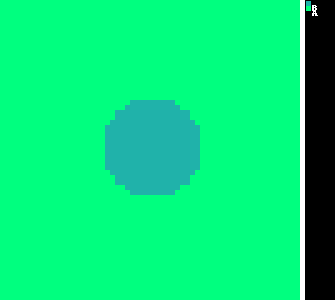

In [9]:
simulation_side_length = 60
particle_radius = 10
background_phase = "A"
particle_phase = "B"

simulation = setup.setup_particle(
    simulation_side_length,
    radius = particle_radius,
    bulk_phase = background_phase,
    particle_phase = particle_phase
)
step_artist.jupyter_show(simulation.state, cell_size=5)

### Organically grown grains

You can also setup organically grown grains using the included `GrowthModel`. In this model, we establish random sites, and then grow particles outward from them in the shape of the specified neighborhood. Here's how it looks with a few different neighborhoods:

#### Moore

100%|███████████████████████████████████████████████| 60/60 [00:00<00:00, 73.34it/s]


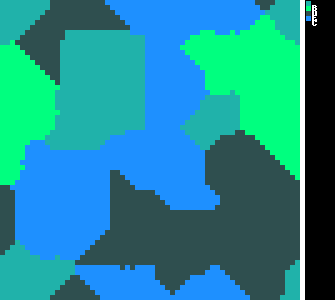

In [27]:
from pylattica.square_grid.growth_setup import GrowthSetup
from pylattica.square_grid.neighborhoods import MooreNbHoodBuilder

simulation_side_length = 60
total_num_sites = 20
background_phase = "A"
site_phases = ["B", "C", "D", "E"]
buffer = 2 # Each site should be at least 2 cells away from any other

growth_setup = GrowthSetup(phases)
simulation = growth_setup.grow(
    simulation_side_length,
    background_spec=background_phase,
    num_sites_desired=total_num_sites,
    nuc_species=site_phases,
    buffer=buffer,
    nb_builder=MooreNbHoodBuilder(1)
)
step_artist.jupyter_show(simulation.state, cell_size=5)

#### Von Neumann

100%|███████████████████████████████████████████████| 60/60 [00:00<00:00, 73.53it/s]


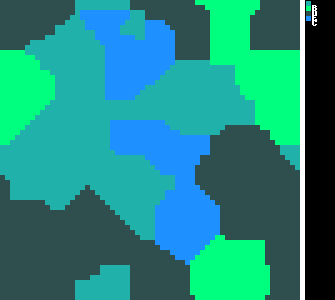

In [28]:
from pylattica.square_grid.neighborhoods import VonNeumannNbHood2DBuilder

simulation = growth_setup.grow(
    simulation_side_length,
    background_spec=background_phase,
    num_sites_desired=total_num_sites,
    nuc_species=site_phases,
    buffer=buffer,
    nb_builder=VonNeumannNbHood2DBuilder()
)
step_artist.jupyter_show(simulation.state, cell_size=5)

#### Circular

100%|███████████████████████████████████████████████| 60/60 [00:00<00:00, 64.06it/s]


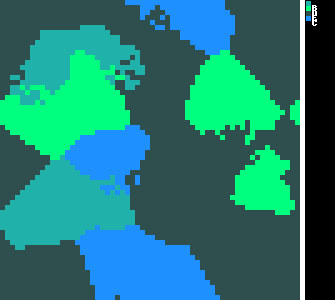

In [30]:
from pylattica.square_grid.neighborhoods import CircularNeighborhoodBuilder

simulation = growth_setup.grow(
    simulation_side_length,
    background_spec=background_phase,
    num_sites_desired=total_num_sites,
    nuc_species=site_phases,
    buffer=buffer,
    nb_builder=CircularNeighborhoodBuilder(5)
)
step_artist.jupyter_show(simulation.state, cell_size=5)

## Structure and State (or the `Simulation` object)

The output of the setup methods defined above is an instance of `Simulation`. This object has two attributes: `.structure` and `.state`. The structure refers to the lattice of sites that underpins the simulation. In the case of these states we just set up, that lattice is a 2D square grid. In general, it can be any type of lattice. This lattice is called the "structure" of the simulation state. It is subject to periodic boundary conditions, meaning that a cell on the edge of the structure is a neighbor to the cell on the opposite edge of the grid.

You can access the structure via the `structure` attribute, and view it's sites. We'll use a small interface simulation for this example.

In [ ]:
simulation_side_length = 4
left_phase = "A"
right_phase = "B"

simulation = setup.setup_interface(simulation_side_length, left_phase, right_phase)

Here's how you see all the sites in the structure:

In [ ]:
simulation.structure.sites()

See how the locations are represented by two coordinates? They lie on a square grid.

Every site in this structure has a `_site_class` of "_A". This is not significant. In other, more complex simulations, this attribute can be used to distinguish types of sites that exist in the structure. For instance, in materials science, we refer to lattice sites by their coordination structure (e.g. tetrahedral, octahedral).

#### Simulation State Dictionary

You may have noticed that the sites in our structure also have IDs. These IDs are referred to by the `SimulationState`. This object is essentially a dictionary that maps site IDs to the state of that site. A site state can be any arbitrary python dictionary, but in our case each site is just assigned an occupancy value. Let's make some sense of this.

The first site we have is (0,0). It's ID is 0 as well.

In [ ]:
site = simulation.structure.sites()[0]
print(f'Site {site["_site_id"]} is at {site["_location"]}')

Now let's see what it's state is:

In [ ]:
simulation.state.get_site_state(0)

The `DISCRETE_OCCUPANCY` key indicates the "phase" that occupies that cell. Let's see if that lines up with our visualization. Remember, this site is at (0,0), or the bottom left of the simulation state.

In [ ]:
step_artist.jupyter_show(simulation.state, cell_size=24)

Sure enough, that bottom left cell is an 'A' cell!

Every site in this structure has a `_site_class` of "_A". This is not significant. In other, more complex simulations, this attribute can be used to distinguish types of sites that exist in the structure. For instance, in materials science, we refer to lattice sites by their coordination structure (e.g. tetrahedral, octahedral).